## Ultimate Inc. Data Science Challenge
Ultimate Technologies Inc. is an American worldwide online transportation network company headquartered in San Francisco, California. Founded by Jarvis Karolick in 2010, it has completely disrupted the taxi and logistics industry, and is one of the most prestigious companies to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge. 

### Part 1 - Exploratory data analysis
The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that characterize the underlying patterns of the demand. Report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, report them.

In [1]:
import json
from pprint import pprint
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from math import floor
import numpy as np

In [2]:
data = json.load(open('/Users/nzhang/Springboard_DS/take_home_challenge/ultimate_challenge/logins.json'))
df = pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df['login_time'] = sorted(df['login_time'].apply(lambda s: dt.strptime(s, '%Y-%m-%d %H:%M:%S')))

In [4]:
print(df.min())
print(df.max())

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]
login_time   1970-04-13 18:57:38
dtype: datetime64[ns]


The range is between 1970-01-01 20:12:16 and 1970-04-13 18:57:38

In [5]:
df['date'] = df['login_time'].apply(lambda d: d.date())
df['time'] = df['login_time'].apply(lambda d: d.time())
df['month'] = df['login_time'].apply(lambda d: d.month)
df['week_num'] = df['login_time'].apply(lambda d: d.isocalendar()[1])
df['weekday'] = df['login_time'].apply(lambda d: d.weekday())
df['hour'] = df['login_time'].apply(lambda d: d.hour)
df['15_min_interval'] = df['login_time'].apply(lambda d: d.hour*4 + floor(d.minute/15))

In [6]:
df.head()

,login_time,date,time,month,week_num,weekday,hour,15_min_interval
0,1970-01-01 20:12:16,1970-01-01,20:12:16,1,1,3,20,80
1,1970-01-01 20:13:18,1970-01-01,20:13:18,1,1,3,20,80
2,1970-01-01 20:16:10,1970-01-01,20:16:10,1,1,3,20,81
3,1970-01-01 20:16:36,1970-01-01,20:16:36,1,1,3,20,81
4,1970-01-01 20:16:37,1970-01-01,20:16:37,1,1,3,20,81


#### Daily Distribution

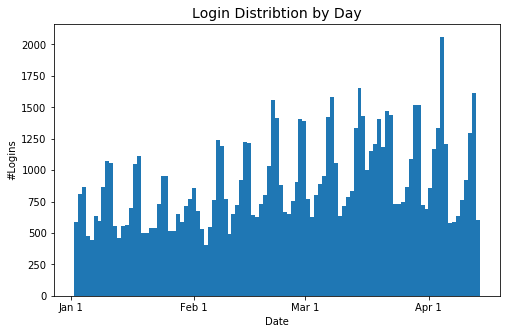

In [7]:
plt.figure(figsize=(8,5))
plt.hist(x=df['login_time'], bins=len(set(df['date'])))
plt.xlabel('Date')
plt.ylabel('#Logins')
plt.title('Login Distribtion by Day', size=14)
plt.xticks(('1970-01-01','1970-02-01','1970-03-01','1970-04-01'), ('Jan 1','Feb 1','Mar 1','Apr 1'))
plt.show()

1. There is an obvious regularity in the daily plot. Because there are 4 peaks/valleys each month, the regularity should be weekly. We will want to take a closer look at the distribution by weekdays.

2. The #logins are increasing in general. With less than 5 months data, it is hard to say whether it is due to seasonality, expansion of business, or just randomness.

#### Weekday Distribution

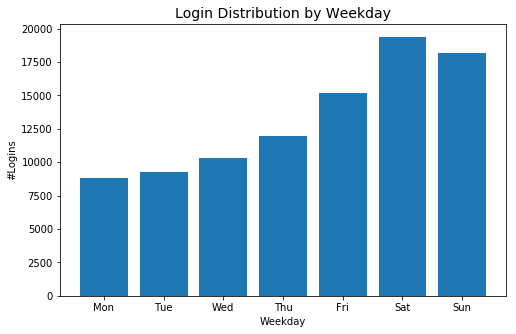

In [8]:
vc = df['weekday'].value_counts().sort_index().reset_index()

plt.figure(figsize=(8,5))
plt.bar(vc['index'], vc['weekday'])
plt.xlabel('Weekday')
plt.ylabel('#Logins')
plt.title('Login Distribution by Weekday', size=14)
plt.xticks((0,1,2,3,4,5,6), ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()

Users log in more frequent during weekends, because of more transportation needs besides work.

#### Daily Circle

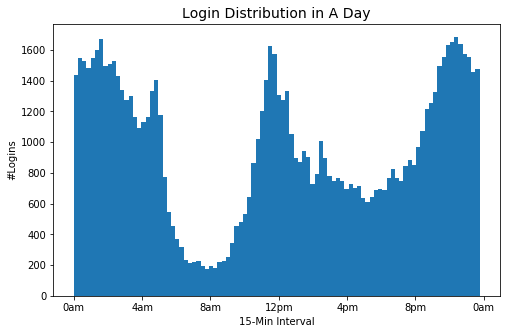

In [9]:
plt.figure(figsize=(8,5))
plt.hist(x=df['15_min_interval'], bins=len(set(df['15_min_interval'])))
plt.xlabel('15-Min Interval')
plt.ylabel('#Logins')
plt.title('Login Distribution in A Day', size=14)
plt.xticks((0,16,32,48,64,80,96), ('0am','4am','8am','12pm','4pm','8pm','0am'))
plt.show()

There are multiple peaks of logins during a day:

First peak is around 5am early morning, when people start their days and check transportations;

Second peak is around noon, when people going out for lunch;

Last one is around 10pm, when people working late or hanging out are heading home.

### Part 2 ‑ Experiment and metrics design 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two \xadway toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

    a. how you will implement the experiment 
    
    b. what statistical test(s) you will conduct to verify the significance of the observation 

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

#### Data description 
● city: city this user signed up in

● phone: primary device for this user 

● signup_date: date of account registration; in the form ‘YYYY MM DD’ 

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’ 

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup 

● avg_rating_by_driver: the rider’s average rating over all of their trips 

● avg_rating_of_driver: the rider’s average rating of their drivers overall of their trips 

● surge_pct:the percent of trips taken with surge multiplier > 1 

● avg_surge: The average surge multiplier overall of this user’s trips 

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up 

● ultimate_black_user: TRUE if the user took an UltimateBlack in their first 30 days; FALSE otherwise 

● weekday_pct:the percent of the user’s trips occurring during a weekday

In [10]:
data2 = json.load(open('/Users/nzhang/Springboard_DS/take_home_challenge/ultimate_challenge/ultimate_data_challenge.json'))

In [11]:
df2 = pd.DataFrame(data2)
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? 

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long\xadterm rider retention (again, a few sentences will suffice).